In [2]:
import sys
import networkx as nx
import numpy as np
import random
from collections import defaultdict
import torch
import math
import importlib
import pandas as pd
#torch.set_num_threads(1)

sys.path.insert(0, '../../')
import python_lib.graph_gen as graph_gen
import python_lib.models as models
#from python_lib import solvers



In [3]:
%matplotlib inline

# Sherrington Kirkpatrick

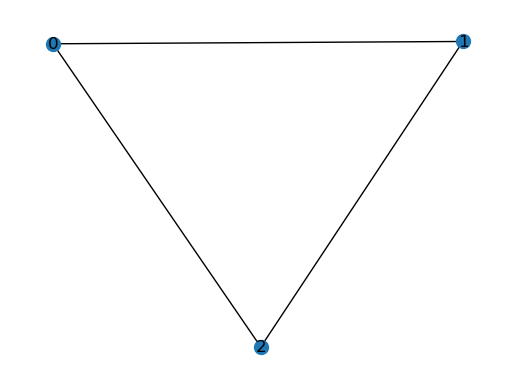

In [60]:
import importlib
import matplotlib.pyplot as plt
import random
seed=4

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
N = 3
fig, ax0 = plt.subplots(1,1)
J_interaction = torch.ones(N,N) - torch.eye(N, N)

inter_H = 0
H = inter_H * (torch.ones(N))
J_sigma_val=1
J_0_val=0
if N < 200:
    graph_gen.plot_matrix_graph(J_interaction, ax0)

J_prob = graph_gen.spin_glass(N, J = J_sigma_val, J_0 = J_0_val)
J = graph_gen.set_J(J_interaction, J_prob)
#J = (J + J.transpose())
#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

# Exact solutions
enumerating all configurations.
Th. results

In [61]:
from python_lib.models import spins_model
import python_lib.models
importlib.reload(spins_model)
from python_lib.models import spins_model

device="cpu"
#device="mps"
SK_model = spins_model.model(N, H, J, J_interaction, device=device)
beta_fin=2
beta_init = 0.1
step = 39
betas = np.linspace(beta_init, beta_fin, step)

stats_step=1

In [62]:
from python_lib.models import spins_model
importlib.reload(spins_model)

SK_model_exact = spins_model.model(N, H, J, J_interaction, device="cpu")
f_exact = []
f_exact_infN = []
steps = 0
for beta_ in betas:
    if steps % stats_step == 0:
        f_exact.append(SK_model_exact.exact(beta_))
    steps += 1


beta: 0.1, Fe: -6.938 Energy: -0.0138 M: 9.91e-09 S: 0.692
beta: 0.1, Fe: -4.631 Energy: -0.0206 M: 9.89e-09 S: 0.692
beta: 0.2, Fe: -3.479 Energy: -0.0274 M: -9.85e-09 S: 0.69
beta: 0.2, Fe: -2.790 Energy: -0.0341 M: 9.81e-09 S: 0.689
beta: 0.3, Fe: -2.331 Energy: -0.0407 M: 0.0 S: 0.687
beta: 0.3, Fe: -2.004 Energy: -0.0473 M: 0.0 S: 0.685
beta: 0.4, Fe: -1.760 Energy: -0.0537 M: 9.62e-09 S: 0.683
beta: 0.4, Fe: -1.571 Energy: -0.0601 M: -2.38e-09 S: 0.68
beta: 0.5, Fe: -1.420 Energy: -0.0664 M: -1.18e-08 S: 0.677
beta: 0.5, Fe: -1.297 Energy: -0.0726 M: 9.35e-09 S: 0.674
beta: 0.6, Fe: -1.195 Energy: -0.0787 M: 0.0 S: 0.67
beta: 0.6, Fe: -1.110 Energy: -0.0846 M: 2.28e-09 S: 0.666
beta: 0.7, Fe: -1.037 Energy: -0.0905 M: -9.01e-09 S: 0.662
beta: 0.7, Fe: -0.974 Energy: -0.0962 M: 0.0 S: 0.658
beta: 0.8, Fe: -0.919 Energy: -0.102 M: 1.09e-08 S: 0.654
beta: 0.8, Fe: -0.871 Energy: -0.107 M: -4.31e-09 S: 0.649
beta: 0.9, Fe: -0.829 Energy: -0.113 M: 1.06e-08 S: 0.645
beta: 0.9, Fe: -0.

# Theoretical Values
at zero temperature
K0 S=-0.16 U=-0.798 
K1 S=-0.01 U=-0.7653 
K2 S=-0.004 U=-0.7636 

In [63]:
data_exact = pd.DataFrame(f_exact)


<AxesSubplot:xlabel='beta'>

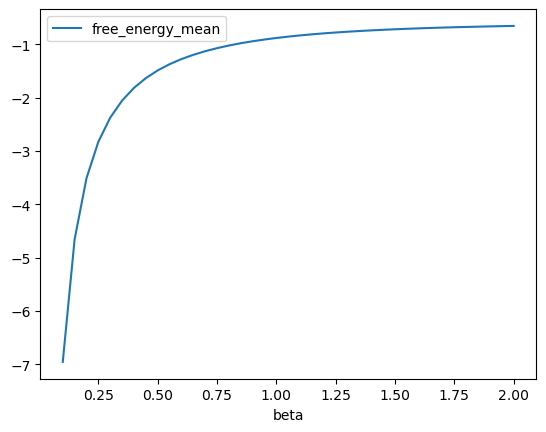

In [64]:
data.plot(x="beta", y= "free_energy_mean",)


# Several cases

In [65]:
from python_lib.nets import list_nets
importlib.reload(list_nets)
import python_lib.nets.ann
importlib.reload(python_lib.nets.ann)
from python_lib import run_lib
importlib.reload(run_lib);

In [66]:
lr = 0.001
max_step = 1000
batch_size=2000
std_fe_limit=1e-4
batch_iter=20
stats_step=1

In [67]:
from python_lib.nets import ann
importlib.reload(ann)

from python_lib.nets import list_nets
importlib.reload(list_nets)

one = list_nets.SK_net_rs
input_mask = torch.tril(J_interaction, diagonal=-1)
input_mask = input_mask.to(dtype=torch.bool)
dict_nets = {"set_exact": False}
net2train = list_nets.list_nets(SK_model, one, input_mask, device=device, dict_nets=dict_nets)
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_SK_net_rs",
    batch_iter=batch_iter,
    stats_step=stats_step
)
data = pd.concat([data, res], axis = 1)


/Users/ocadni/opt/anaconda3/envs/m1torch/lib/python3.10/site-packages/torch/nn/init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Total Trainable Params: 26
Total Params: 26
step: 231 0.10000 fe: -6.901 +- 0.63933 E: -0.005, S: 0.690, M: 0.493

[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument


KeyboardInterrupt: 

In [68]:
from python_lib.nets import ann
importlib.reload(ann)

from python_lib.nets import list_nets
importlib.reload(list_nets)

one = list_nets.SK_net_rs
input_mask = torch.tril(J_interaction, diagonal=-1)
input_mask = input_mask.to(dtype=torch.bool)
dict_nets = {"set_exact": True}
net2train = list_nets.list_nets(SK_model, one, input_mask, device=device, dict_nets=dict_nets)
#[nnn.set_params_first_l(SK_model) for nnn in net2train.net]
net2train.set_params_exact(SK_model, betas[0])
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_SK_net_rs_set",
    batch_iter=batch_iter,
    stats_step=stats_step
)
data = pd.concat([data, res], axis = 1)


Total Trainable Params: 22
Total Params: 26
step: 144 0.10000 fe: -6.861 +- 0.62758 E: 0.032, S: 0.689, M: 0.514

KeyboardInterrupt: 

In [42]:
from python_lib.nets import made
import importlib
importlib.reload(made);

net2train = made.MADE(SK_model, bias=True, device=device)
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_MADE",
    batch_iter=batch_iter,
    stats_step=stats_step
)
data = pd.concat([data, res], axis = 1)


num_params: True
Total Trainable Params: 420
num_params: False
Total Params: 420
step: 1019 2.00000 fe: -0.654 +- 0.00726 E: -0.491, S: 0.325, M: 0.149

In [47]:
from python_lib.nets import made
import importlib
importlib.reload(made);

net2train = made.MADE(SK_model, 
    bias=True, 
    device=device,
    net_depth=2,
    net_width=1
)
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_MADE_21",
    batch_iter=batch_iter,
    stats_step=stats_step
)
data = pd.concat([data, res], axis = 1)


num_params: True
Total Trainable Params: 860
num_params: False
Total Params: 860
step: 1019 2.00000 fe: -0.654 +- 0.00723 E: -0.491, S: 0.326, M: 0.147

In [48]:
from python_lib.nets import made
import importlib
importlib.reload(made);

net2train = made.MADE(SK_model, 
    bias=True, 
    device=device,
    net_depth=2,
    net_width=2
)
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_MADE_22",
    batch_iter=batch_iter,
    stats_step=stats_step
)
data = pd.concat([data, res], axis = 1)


num_params: True
Total Trainable Params: 1700
num_params: False
Total Params: 1700
step: 1019 2.00000 fe: -0.654 +- 0.00570 E: -0.490, S: 0.327, M: 0.143

In [51]:
data["beta"] = betas

In [53]:
name_nets=["_SK_net_rs", "_SK_net_rs_set", "_MADE", "_MADE_21", "_MADE_22", ]

for kk in name_nets:
    data[f"err_fe{kk}"] = np.abs(data[f"free_energy_mean{kk}"] - data["free_energy_mean"])
    data[f"err_fe{kk}_rel"] = np.abs((data[f"err_fe{kk}"] / data["free_energy_mean"]))


In [54]:
data.to_csv(f"data/SK_N{N}_bs{batch_size}_fe_lim{std_fe_limit}_lr{lr}_max_iter{max_step}_beta_step{step}.zip")

In [55]:
data = pd.read_csv(f"data/SK_N{N}_bs{batch_size}_fe_lim{std_fe_limit}_lr{lr}_max_iter{max_step}_beta_step{step}.zip")

<AxesSubplot:xlabel='beta'>

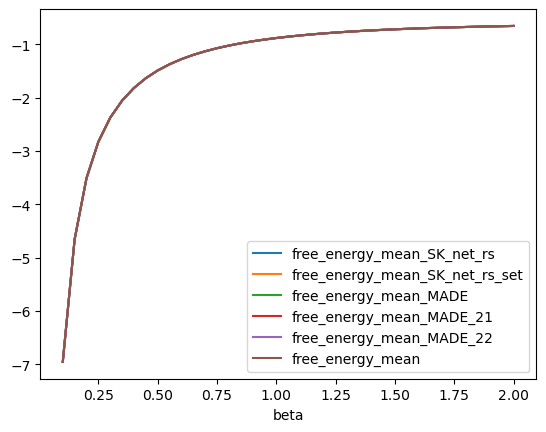

In [57]:
kkk="free_energy_mean"
namess=[f"{kkk}{x}" for x in name_nets]
namess.append("free_energy_mean")
data.plot(x="beta", y=namess)


<AxesSubplot:xlabel='beta'>

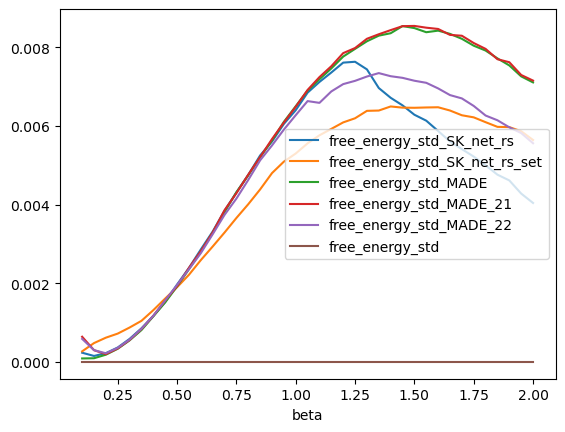

In [58]:
kkk="free_energy_std"
namess=[f"{kkk}{x}" for x in name_nets]
namess.append("free_energy_std")
data.plot(x="beta", y=namess)

<AxesSubplot:xlabel='beta'>

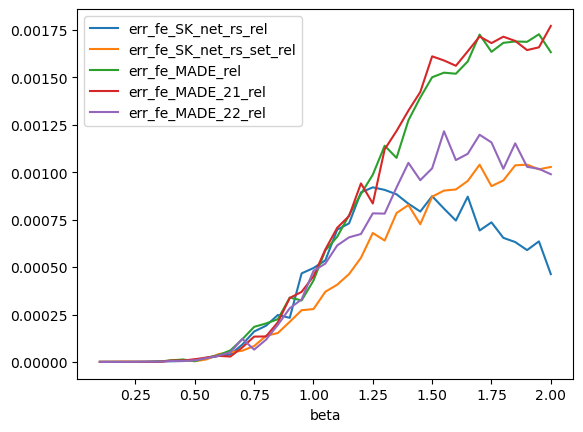

In [59]:
namess=[f"err_fe{x}_rel" for x in name_nets]
#namess.append("free_energy_std")
data.plot(x="beta", y=namess)

<AxesSubplot:xlabel='beta'>

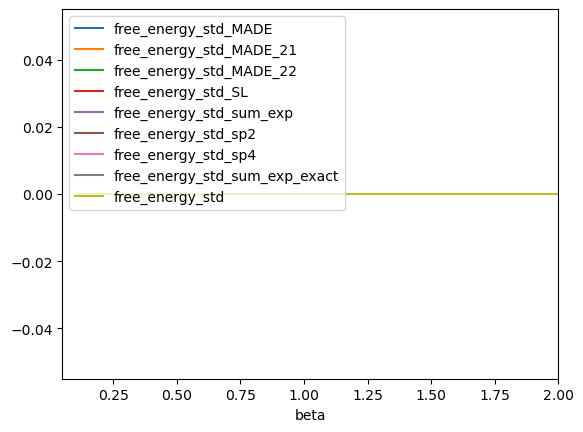

In [ ]:
name_nets=["_MADE", "_MADE_21", "_MADE_22", "_SL", "_sum_exp", "_sp2", "_sp4", "_sum_exp_exact"]
kkk="free_energy_std"
namess=[f"{kkk}{x}" for x in name_nets]
namess.append("free_energy_std")
data[data["beta"]> 0.1].plot(x="beta", y=namess, xlim=(0.05,2))

<AxesSubplot:xlabel='beta'>

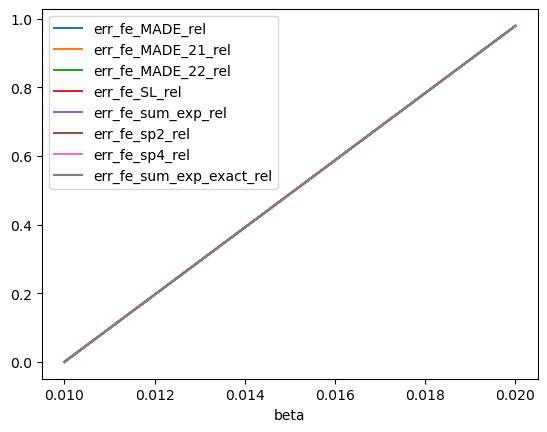

In [ ]:
name_nets=["_MADE", "_MADE_21", "_MADE_22", "_SL", "_sum_exp", "_sp2", "_sp4", "_sum_exp_exact"]
namess=[f"err_fe{x}_rel" for x in name_nets]
#namess.append("free_energy_std")
data.plot(x="beta", y=namess)

<AxesSubplot:xlabel='beta'>

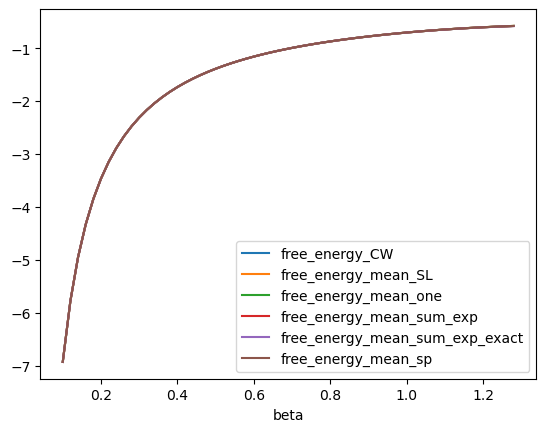

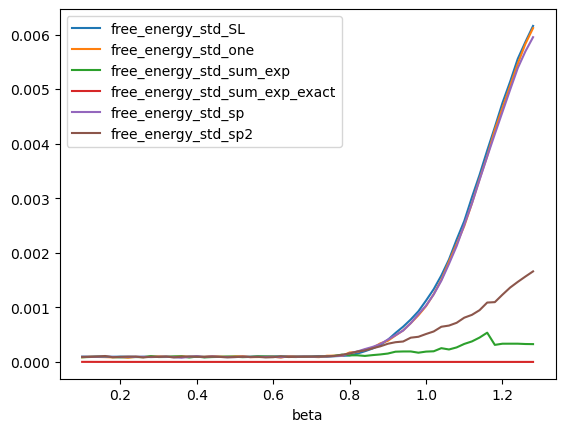

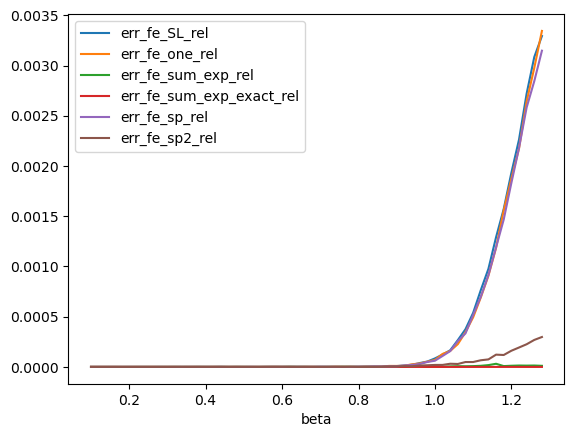

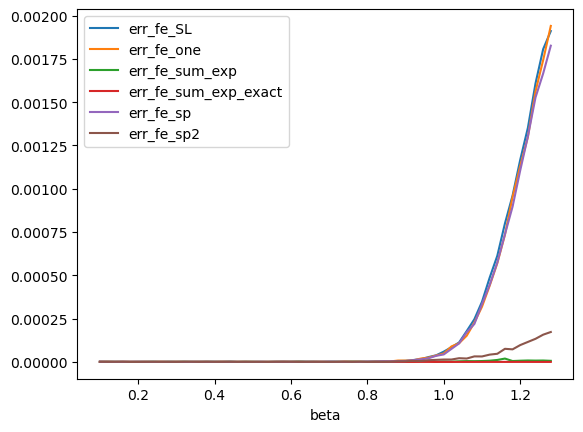

In [ ]:

data.plot(x="beta", y=["free_energy_std_SL", "free_energy_std_one", "free_energy_std_sum_exp", "free_energy_std_sum_exp_exact","free_energy_std_sp","free_energy_std_sp2",]) #"free_energy_std_sp4"])
data.plot(x="beta", y=["err_fe_SL_rel", "err_fe_one_rel", "err_fe_sum_exp_rel", "err_fe_sum_exp_exact_rel","err_fe_sp_rel","err_fe_sp2_rel"])#,"err_fe_sp4_rel"])
data.plot(x="beta", y=["err_fe_SL", "err_fe_one", "err_fe_sum_exp", "err_fe_sum_exp_exact", "err_fe_sp", "err_fe_sp2"])# "err_fe_sp4"])

In [ ]:
data.plot(x="beta", y=["mag_mean", "mag_mean_CW", "mag_mean_SL", "mag_mean_one", "mag_mean_sum_exp", "mag_mean_sum_exp_exact"])


KeyError: "['mag_mean'] not in index"

In [ ]:
data.plot(x="beta", y=["entropy_mean", "entropy_mean_SL", "entropy_mean_1V", "entropy_mean_SK", "entropy_mean_SK_exact"])


KeyError: "['entropy_mean', 'entropy_mean_1V', 'entropy_mean_SK', 'entropy_mean_SK_exact'] not in index"

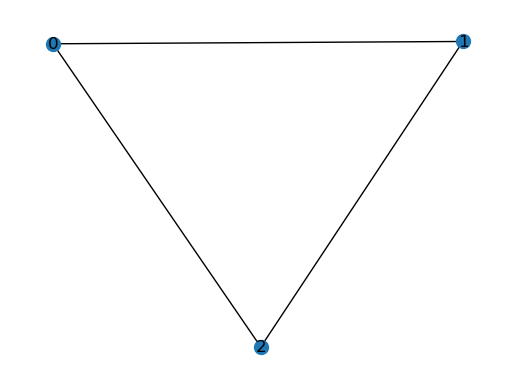

In [ ]:
from python_lib.models import spins_model
import python_lib.models
importlib.reload(spins_model)
from python_lib.models import spins_model

N = 3
fig, ax0 = plt.subplots(1,1)
J_interaction = torch.ones(N,N) - torch.eye(N, N)

inter_H = 0
H = inter_H * (torch.ones(N))

if N < 200:
    graph_gen.plot_matrix_graph(J_interaction, ax0)
JJ=1
J_val = JJ/(2*N)
J = J_val * J_interaction


device="cpu"
#device="mps"
CW_model = spins_model.model(N, H, J, J_interaction, device=device)
beta_fin=1.3
beta_init = 0.1
step = 0.1
betas = np.arange(beta_init, beta_fin
, step)

In [ ]:
from python_lib.nets import ann
importlib.reload(ann)
from python_lib.nets import list_nets
importlib.reload(list_nets)

one = list_nets.SK_net
input_mask = torch.tril(J_interaction, diagonal=-1)
input_mask = input_mask.long()
dict_nets = {}
net2train = list_nets.list_nets(CW_model, one, input_mask, device=device, dict_nets=dict_nets)

In [ ]:
beta = 1
net2train.train(
    beta=beta,
    lr=lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit = 0.001,
    exact=True
)


step: 0 1.00 fe: -0.594 +- 0.24724 E: 0.069, S: 0.662, M: 0.397

{'beta': 1,
 'free_energy_mean': -0.5935537020365397,
 'free_energy_std': 0.2472420334815979,
 'entropy_mean': 0.6624425649642944,
 'energy_mean': 0.06888888776302338,
 'mag': array([ 0.001, -0.008,  0.034], dtype=float32),
 'mag_mean': 0.3966667056083679}

In [ ]:
x, hx=net2train.sample(200000)
torch.abs(x.mean(-1)).mean(), x.mean(-1).mean()

(tensor(0.3982), tensor(0.0010))

In [ ]:
i = 0
for nnet in net2train.net:
    print(f"ni: {i}")
    i+=1
    for name, param in nnet.named_parameters():
        print(name, param.data)


ni: 0
weight_p tensor([[ 0.3333,  0.0000, -0.3333]])
bias_p tensor([[1.0000, 0.6931, 0.3333]])
weight_m tensor([[ 0.3333,  0.0000, -0.3333]])
bias_m tensor([[0.3333, 0.6931, 1.0000]])
weight_0p tensor([1.])
weight_0m tensor([-1.])
weight_0 tensor([-0.3333])
bias_0 tensor([-0.])
ni: 1
weight_p tensor([[ 0.1667, -0.1667]])
bias_p tensor([[0.3333, 0.0000]])
weight_m tensor([[ 0.1667, -0.1667]])
bias_m tensor([[0.0000, 0.3333]])
weight_0p tensor([1.])
weight_0m tensor([-1.])
weight_0 tensor([-0.3333])
bias_0 tensor([-0.])
ni: 2
weight_0 tensor([-0.3333])
bias_0 tensor([-0.])


In [ ]:
m = x.sum(-1)
m

tensor([ 2., -6.])

In [ ]:
weight_p = torch.tensor([[1,2,3,4]], device=device)

In [ ]:
weight_p

tensor([[1, 2, 3, 4]])

In [ ]:
res = weight_p * torch.unsqueeze(m, dim=1)
res

tensor([[  2.,   4.,   6.,   8.],
        [ -6., -12., -18., -24.]])

In [ ]:
torch.logsumexp(res, 1)

tensor([ 8.1451, -5.9975])

In [ ]:
pd.__version__

In [ ]:
data.plot(x="beta", y=["free_energy_std_SL", "free_energy_std_1V"], ylim=(0, 0.1))

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
stats_pd.plot.line(x="beta", y="energy_mean")

In [ ]:
stats_pd.plot.line(x="beta", y="energy_mean")

In [ ]:
all_Js = np.array(all_Js)

In [ ]:
plt.plot(stats_pd["beta"], all_Js[:,2])
plt.plot(stats_pd["beta"], all_Js[:,3])
plt.plot(stats_pd["beta"], all_Js[:,4])
plt.plot(stats_pd["beta"], all_Js[:,5])
plt.plot(stats_pd["beta"], all_Js[:,19])

In [ ]:
import pandas as pd

lr = 0.001
max_step=1000
batch_size=1000
stats = []
net2train = net
for beta in betas:
    net2train.train(
        beta=beta,
        lr=lr,
        max_step=max_step,
        batch_size=batch_size,
        std_fe_limit = 0.001
    )

    stats.append(net.compute_stats(
        beta, batch_size=batch_size, print_=True))
stats_pd = pd.DataFrame(stats)

In [ ]:
from python_lib.nets import simplest
from python_lib.solvers import train_nn_anneal
importlib.reload(simplest)
importlib.reload(solvers)
bias = True
net_simplest = simplest.simplest(CW_model.N, CW_model, bias, device=device)

In [ ]:
from python_lib.nets import one_var
importlib.reload(one_var)
bias = True
net_one_var = one_var.one_var(CW_model.N, CW_model, bias, device=device)

In [ ]:
from python_lib.solvers import train_nn_anneal
importlib.reload(simple_layer)
importlib.reload(solvers)
import pandas as pd

lr = 0.001
max_step=1000
batch_size=1000
stats = []
net2train = net_one_var
for beta in betas:
    net2train.train(
        beta=beta,
        lr=lr,
        max_step=max_step,
        batch_size=batch_size,
        std_fe_limit = 0.001
    )

    stats.append(net.compute_stats(
        beta, batch_size=batch_size, print_=True))
stats_pd = pd.DataFrame(stats)

In [ ]:
stats_pd_est = pd.DataFrame(stats)
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2) = plt.subplots(3,1)
ax0.plot(betas, stats_pd_est["free_energy_mean"], ".")
ax0.plot(betas, f_exact)
ax0.set_ylim(-1.25,0.)

ax1.plot(betas, np.abs(f_exact-stats_pd_est["free_energy_mean"])/np.abs(f_exact))
ax1.plot(betas, np.abs(f_exact-stats_pd_est["free_energy_mean"]))
    
ax2.plot(stats_pd_est["free_energy_std"])

In [ ]:
net_simplest.layer1.weight

In [ ]:
from python_lib.solvers import train_nn_anneal
importlib.reload(simple_layer)
importlib.reload(solvers)
import pandas as pd

lr = 0.001
max_step=100
batch_size=2000
stats = train_nn_anneal(
    net, 
    np.full(100, 0.0001),
    lr=lr, 
    max_step=5,
    batch_size=batch_size)
stats = train_nn_anneal(
    net, 
    betas,
    lr=lr, 
    max_step=max_step,
    batch_size=batch_size)
stats_pd = pd.DataFrame(stats)

In [ ]:
stats_pd = pd.DataFrame(stats)

In [ ]:
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2) = plt.subplots(3,1)
ax0.plot(betas, stats_pd["free_energy_mean"], ".")
ax0.plot(betas, f_exact)
ax0.set_ylim(-1.25,-0.6)

ax1.plot(betas, np.abs(f_exact-stats_pd["free_energy_mean"])/np.abs(f_exact))
    
ax2.plot(stats_pd["free_energy_std"])

In [ ]:
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2) = plt.subplots(3,1)
ax0.plot(betas, stats_pd["free_energy_mean"], ".")
ax0.plot(betas, f_exact)
ax0.set_ylim(-1.25,-0.6)

ax1.plot(betas, np.abs(f_exact-stats_pd["free_energy_mean"]))
    
ax2.plot(stats_pd["free_energy_std"])

In [ ]:
stats_pd.keys()

In [ ]:
stats_pd[stats_pd["beta"]==0.2]

In [ ]:
import matplotlib.pyplot as plt
fig, (ax0, ax1) = plt.subplots(2,1)
ax0.plot(betas, stats_pd["free_energy_mean"], ".")
ax0.plot(np.linspace(0.001,beta,100), f_exact)
ax0.set_ylim(-1.25,-0.7)

for b in np.linspace(0.001,beta,100):
    
err = [np.abs()]

In [ ]:
net.compute_stats(beta, batch_size=50000)

## random case

In [ ]:
from python_lib.nets import bp_nn
importlib.reload(bp_nn)

net_rand = bp_nn.bp_nn(tree_rand.N, tree_rand, True, z2=False, init_zero=False,)
                      
net_rand.train(beta=beta, lr=0.001, 
           max_step=1000,
               opt="adam")


In [ ]:
net_rand.compute_stat_is(beta, batch_size=10000)

# BP solution

In [ ]:
import bp_solver
importlib.reload(bp_solver)

bp_sol = bp_solver.BP_solver(tree_rand)

In [ ]:
beta

In [ ]:
bp_sol.converge(beta)